In [144]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import seaborn as sns
from datetime import *
from dateutil.relativedelta import relativedelta
from optim import *

In [ ]:
cutoff_date = datetime(2023, 4, 30).date()
cutoff_date

datetime.date(2023, 4, 30)

In [146]:
pd.read_excel("portfolioTickers.xlsx")

,highCorrelationPortfolio,mixedCorrelationPortfolio,lowCorrelationPortfolio
0,AEE,PNW,ABT
1,AEP,TKO,AIG
2,CMS,AEP,AKAM
3,D,DUK,AXON
4,DTE,SO,CAG
5,DUK,CNC,CTRA
6,ED,DVA,DECK
7,ES,ED,DLTR
8,EVRG,WEC,MNST
9,LNT,AEE,MOH


Downloading historical prices

In [ ]:
tickers = list(pd.read_excel("portfolioTickers.xlsx")["highCorrelationPortfolio"])
prices = yf.download(tickers = tickers, start = "2015-04-30", end = "2025-04-30", progress = False)["Close"].dropna()
prices

Ticker,AEE,AEP,CMS,D,DTE,DUK,ED,ES,EVRG,LNT
Date,,,,,,,,,,
2015-05-01,30.419346,39.897106,25.378405,46.873032,48.831821,51.260883,42.763180,35.008717,26.369213,22.346415
2015-05-04,30.707294,40.127975,25.459915,46.912247,49.155025,51.300350,43.068329,35.345284,26.585934,22.661406
2015-05-05,29.968966,39.106579,24.896761,46.297729,47.984226,50.175114,42.180611,34.528961,25.893843,22.137634
2015-05-06,29.806536,38.817001,24.784651,46.225826,47.532982,50.280403,42.374794,34.213871,25.306622,22.046070
2015-05-07,29.828682,39.028893,24.792124,46.369640,47.801296,50.543610,42.471905,34.314137,25.131845,22.082699
...,...,...,...,...,...,...,...,...,...,...
2025-04-24,98.919998,106.699997,74.139999,53.349998,136.979996,120.699997,111.290001,58.529999,68.279999,61.330002
2025-04-25,98.279999,106.739998,72.180000,52.950001,134.759995,119.849998,110.449997,57.860001,67.879997,60.740002
2025-04-28,98.889999,107.059998,72.510002,53.740002,135.690002,120.669998,111.129997,59.099998,69.019997,60.900002


In [148]:
prices_train = prices.loc[:cutoff_date]
prices_test = prices.loc[cutoff_date:]

In [149]:
returns_train = prices_train.pct_change(fill_method = None).dropna()
returns_train

Ticker,AEE,AEP,CMS,D,DTE,DUK,ED,ES,EVRG,LNT
Date,,,,,,,,,,
2015-05-04,0.009466,0.005787,0.003212,0.000837,0.006619,0.000770,0.007136,0.009614,0.008219,0.014096
2015-05-05,-0.024044,-0.025453,-0.022119,-0.013099,-0.023819,-0.021934,-0.020612,-0.023096,-0.026032,-0.023113
2015-05-06,-0.005420,-0.007405,-0.004503,-0.001553,-0.009404,0.002098,0.004604,-0.009125,-0.022678,-0.004136
2015-05-07,0.000743,0.005459,0.000302,0.003111,0.005645,0.005235,0.002292,0.002931,-0.006906,0.001661
2015-05-08,-0.000248,0.009772,0.014772,0.012125,0.010460,0.003906,-0.002613,0.011269,0.001391,-0.000498
...,...,...,...,...,...,...,...,...,...,...
2023-04-24,0.008448,0.003407,0.010222,-0.003292,0.005717,0.005490,0.008077,0.006342,0.001111,0.004522
2023-04-25,0.000441,0.001486,0.005943,-0.003651,0.004111,0.008494,0.005609,0.002899,0.009352,0.003781
2023-04-26,-0.019502,-0.022568,-0.014530,-0.020764,-0.016027,-0.013936,-0.012550,-0.025889,-0.025911,-0.018834


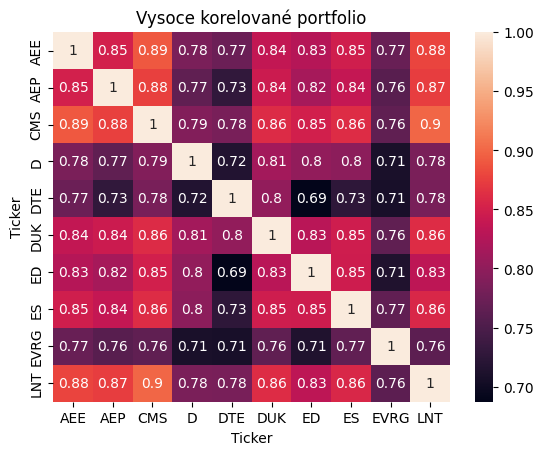

In [150]:
plt.Figure(figsize = (10, 10))
sns.heatmap(returns_train.corr(), annot = True)
plt.title("Vysoce korelované portfolio")
plt.show()

In [151]:
weightsMVOTangent = MVOTangentPortfolio(prices = prices)
weightsPlot(weightsMVOTangent, title = "MVO tangentní portfolio")

Expected annual return: 12.0%
Annual volatility: 20.8%
Sharpe Ratio: 0.58
(np.float64(0.12037931809964425), np.float64(0.20796565614484186), np.float64(0.5788422969983258))


In [152]:
weightsMVOTarget = MVOTargetReturn(prices = prices, target_return = 0.1)
weightsPlot(weightsMVOTarget, title = "MVO optimální portfolio s cílovým výnosem 10% p.a.")

Expected annual return: 10.2%
Annual volatility: 19.4%
Sharpe Ratio: 0.53
(np.float64(0.10244064268307088), np.float64(0.19381926672387878), np.float64(0.52853694276437))


In [153]:
weightsLWCorrelationTangent = MVOTangentPortfolio(prices = prices, cov_matrix_method = "ledoit_cc")
weightsPlot(weightsLWCorrelationTangent, title = "Robustní MVO tangentní portfolio")

Expected annual return: 12.0%
Annual volatility: 20.6%
Sharpe Ratio: 0.58
(np.float64(0.12022760560688125), np.float64(0.20635839622132174), np.float64(0.582615526232021))


In [154]:
weightsLWCorrelationTarget = MVOTargetReturn(prices = prices, target_return = 0.1, cov_matrix_method = "ledoit_cc")
weightsPlot(weightsLWCorrelationTarget, title = "Robustní MVO portfolio s cílovým výnosem 10% p.a.")

Expected annual return: 10.2%
Annual volatility: 19.4%
Sharpe Ratio: 0.53
(np.float64(0.10247682985322741), np.float64(0.19354599780416964), np.float64(0.5294701570471828))


In [155]:
weightsCustomDeltaTangent = RobustLedoitWolfCustomDeltaMaxSharpe(prices = prices, custom_delta = 0.5)
weightsPlot(weightsCustomDeltaTangent, title = "Robustní tangentní portfolio s deltou 0.5")

Expected annual return: 11.1%
Annual volatility: 15.3%
Sharpe Ratio: 0.73
(np.float64(0.11096999745041522), np.float64(0.1525446819118666), np.float64(0.7274589717557551))


In [156]:
weightsCustomDeltaTarget = RobustLedoitWolfCustomDeltaTargetReturn(prices = prices, target_return = 0.1, custom_delta = 0.5)
weightsPlot(weightsCustomDeltaTarget, title = "Robustní portfolio s deltou 0.5 a cílovým výnosem 10% p.a.")

Expected annual return: 10.0%
Annual volatility: 14.8%
Sharpe Ratio: 0.68
(np.float64(0.1), np.float64(0.14791205787001688), np.float64(0.6760774032897213))


In [157]:
weightsMinCVaR = CVaROptimizationMinCVAR(prices= prices, alpha = 0.05)
weightsPlot(weightsMinCVaR, title = "CVaR optimální portfolio")

Expected annual return: 10.0%
Conditional Value at Risk: 2.84%
(np.float64(0.09985107271038587), np.float64(0.02836710821028536))


In [158]:
anr = pd.DataFrame()

for ticker in tickers:
    rec = pd.read_excel(r"C:\Users\miros\Desktop\masters\BL_Input\AnalystRecommendation.xlsx", sheet_name = ticker)
    rec["Ticker"] = ticker
    anr = pd.concat([anr, rec])

anr["Upside"] = anr["Target Price"] / anr["Last Price"] - 1
anr

,Dates,Target Price,Last Price,Buy %,Hold %,Sell %,Price Spread,Ticker,Upside
0,2023-04-25,94.230766,90.76,0.533333,0.466667,0.000000,3.470766,AEE,0.038241
1,2023-05-25,94.230766,80.95,0.533333,0.466667,0.000000,13.280766,AEE,0.164061
2,2023-06-25,91.857140,80.83,0.600000,0.400000,0.000000,11.027140,AEE,0.136424
3,2023-07-25,91.923080,88.02,0.600000,0.400000,0.000000,3.903080,AEE,0.044343
4,2023-08-25,88.666664,80.45,0.562500,0.437500,0.000000,8.216664,AEE,0.102134
...,...,...,...,...,...,...,...,...,...
20,2024-12-25,62.576923,59.62,0.285714,0.714286,0.000000,2.956923,LNT,0.049596
21,2025-01-25,62.500000,58.77,0.285714,0.714286,0.000000,3.730000,LNT,0.063468
22,2025-02-25,64.038460,63.75,0.285714,0.714286,0.000000,0.288460,LNT,0.004525
23,2025-03-25,64.708336,62.10,0.285714,0.714286,0.000000,2.608336,LNT,0.042002


In [159]:
views = anr.loc[anr["Dates"] == "2023-04-25"][["Ticker", "Upside"]].set_index("Ticker")
views = views["Upside"].to_dict()
views

{'AEE': 0.038241144737623634,
 'CMS': 0.09272712757464463,
 'D': 0.08988902847963653,
 'DTE': 0.11895008750020408,
 'DUK': 0.0903348706637257,
 'ED': -0.09827357744315712,
 'ES': 0.09633392644644667,
 'LNT': 0.03677128676341779}

In [174]:
weightsBLTangent = blackLittermanAbsoluteViewsMaxSharpe(prices = prices, views = views)
weightsPlot(weightsBLTangent, title = "Black-Litterman tangentní portfolio")

Expected annual return: 8.1%
Annual volatility: 20.4%
Sharpe Ratio: 0.40
(np.float64(0.08113061426905704), np.float64(0.20413790057932818), np.float64(0.3974304332454404))


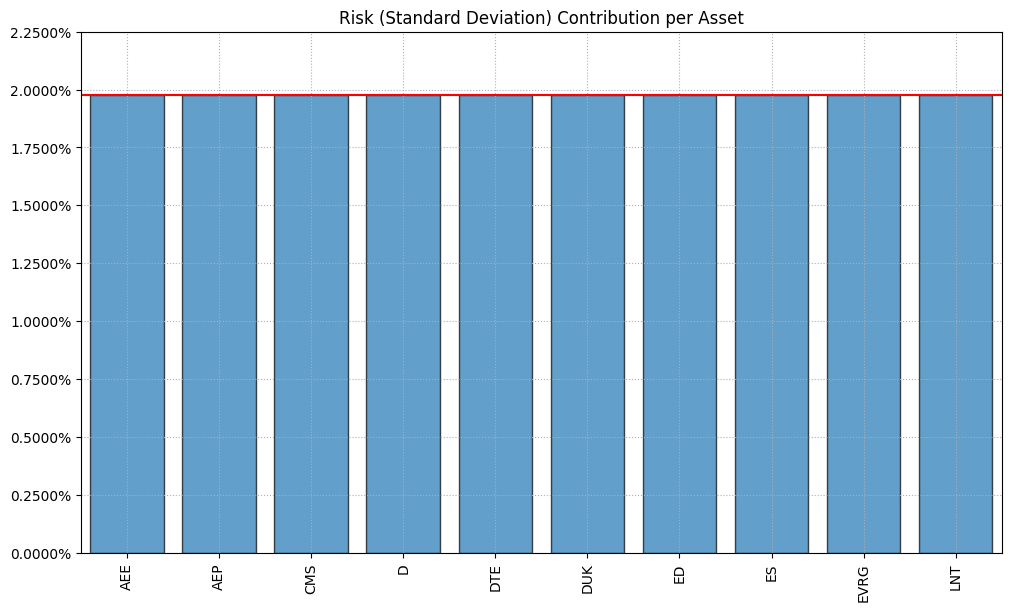

In [161]:
weightsRP_std, rpPlot = riskParityERC(prices = prices)
weightsPlot(weightsRP_std, title = "Rizikově paritní portfolio (směrodatná odchylka)")

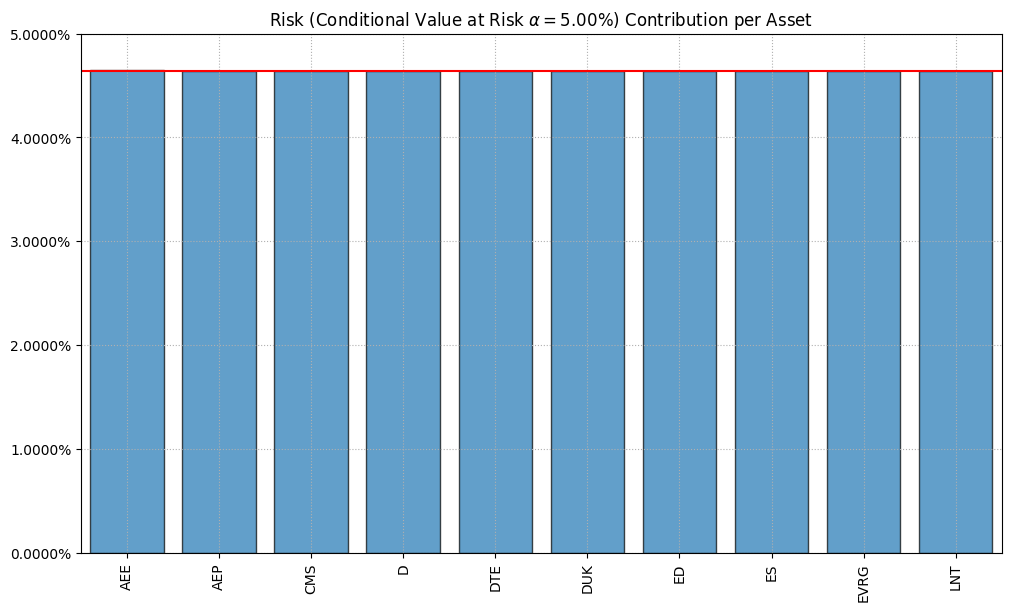

In [162]:
weightsRP_CVaR, rpPlot = riskParityERC(prices = prices, risk_measure = "CVaR")
weightsPlot(weightsRP_CVaR, title = "Rizikově paritní portfolio (CVaR)")

Hierarchical risk parity

In [163]:
in_sample = {
    'MVO Tangent': (weightsRebalancing(weightsMVOTangent, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'MVO Target 10%': (weightsRebalancing(weightsMVOTarget, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'LedoitWolf Tangent': (weightsRebalancing(weightsLWCorrelationTangent, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'LedoitWolf Target 10%': (weightsRebalancing(weightsLWCorrelationTarget, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'MVO Tangent (d = 0.5)': (weightsRebalancing(weightsCustomDeltaTangent, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'MVO Target 10% (d = 0.5)': (weightsRebalancing(weightsCustomDeltaTarget, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'CVaR': (weightsRebalancing(weightsMinCVaR, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'Black-Litterman Tangent': (weightsRebalancing(weightsBLTangent, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'RP (std)': (weightsRebalancing(weightsRP_std, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'RP (CVaR)': (weightsRebalancing(weightsRP_CVaR, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
}

in_sample_returns = pd.DataFrame(in_sample)
in_sample_cumulative_returns = (1 + in_sample_returns).cumprod()
in_sample_cumulative_returns_max = in_sample_cumulative_returns.cummax()
in_sample_drawdowns = (in_sample_cumulative_returns - in_sample_cumulative_returns_max)/in_sample_cumulative_returns_max

px.line(in_sample_cumulative_returns)

In [164]:
px.line(in_sample_drawdowns, title = 'Drawdowns')

In [165]:
in_sample_returns.std().sort_values().map('{:.3%}'.format)

MVO Target 10%              1.260%
LedoitWolf Target 10%       1.265%
MVO Target 10% (d = 0.5)    1.272%
CVaR                        1.273%
RP (std)                    1.279%
RP (CVaR)                   1.279%
MVO Tangent (d = 0.5)       1.285%
Black-Litterman Tangent     1.323%
MVO Tangent                 1.349%
LedoitWolf Tangent          1.349%
dtype: object

In [166]:
in_sample_drawdowns.min().sort_values().map('{:.3%}'.format)

Black-Litterman Tangent     -38.242%
MVO Target 10%              -33.678%
CVaR                        -33.239%
MVO Target 10% (d = 0.5)    -33.160%
RP (std)                    -33.096%
RP (CVaR)                   -33.085%
LedoitWolf Target 10%       -32.910%
MVO Tangent (d = 0.5)       -32.141%
MVO Tangent                 -30.026%
LedoitWolf Tangent          -29.423%
dtype: object

In [167]:
in_sample_cagr = (1 + in_sample_returns).prod() ** (252 / len(in_sample_returns)) - 1
in_sample_cagr.sort_values().map('{:.2%}'.format)

Black-Litterman Tangent      9.16%
CVaR                        10.48%
LedoitWolf Target 10%       10.51%
RP (std)                    10.65%
RP (CVaR)                   10.65%
MVO Target 10%              10.80%
MVO Target 10% (d = 0.5)    11.05%
MVO Tangent (d = 0.5)       12.18%
LedoitWolf Tangent          12.88%
MVO Tangent                 12.98%
dtype: object

In [168]:
returns_test = prices_test.pct_change(fill_method=None).dropna()
returns_test

Ticker,AEE,AEP,CMS,D,DTE,DUK,ED,ES,EVRG,LNT
Date,,,,,,,,,,
2023-05-02,-0.005802,-0.014787,-0.002434,-0.027836,-0.012040,-0.015037,-0.005449,-0.016469,-0.016488,-0.013565
2023-05-03,-0.005162,-0.004492,-0.004879,0.004142,0.000269,-0.002766,-0.005377,0.002617,0.003906,-0.002017
2023-05-04,0.012409,0.006273,0.009687,0.014526,0.009406,0.008014,0.004896,0.001044,0.008106,0.006798
2023-05-05,0.008022,0.007327,0.011258,-0.001414,0.006035,0.012741,0.009846,0.009385,0.006594,0.005657
2023-05-08,-0.014701,0.000326,-0.012746,0.000177,-0.003176,-0.004630,-0.004825,-0.008910,-0.008628,-0.006351
...,...,...,...,...,...,...,...,...,...,...
2025-04-24,0.002940,-0.002990,0.008707,0.000375,0.006022,-0.005930,-0.010931,0.009834,0.002496,0.001633
2025-04-25,-0.006470,0.000375,-0.026436,-0.007498,-0.016207,-0.007042,-0.007548,-0.011447,-0.005858,-0.009620
2025-04-28,0.006207,0.002998,0.004572,0.014920,0.006901,0.006842,0.006157,0.021431,0.016794,0.002634


In [169]:
out_of_sample = {
    'MVO Tangent': (weightsRebalancing(weightsMVOTangent, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'MVO Target 10%': (weightsRebalancing(weightsMVOTarget, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'LedoitWolf Tangent': (weightsRebalancing(weightsLWCorrelationTangent, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'LedoitWolf Target 10%': (weightsRebalancing(weightsLWCorrelationTarget, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'MVO Tangent (d = 0.5)': (weightsRebalancing(weightsCustomDeltaTangent, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'MVO Target 10% (d = 0.5)': (weightsRebalancing(weightsCustomDeltaTarget, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'CVaR': (weightsRebalancing(weightsMinCVaR, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'Black-Litterman Tangent': (weightsRebalancing(weightsBLTangent, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'RP (std)': (weightsRebalancing(weightsRP_std, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'RP (CVaR)': (weightsRebalancing(weightsRP_CVaR, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
}

out_of_sample_returns = pd.DataFrame(out_of_sample)
out_of_sample_cumulative_returns = (1 + out_of_sample_returns).cumprod()
out_of_sample_cumulative_returns_max = out_of_sample_cumulative_returns.cummax()
out_of_sample_drawdowns = (out_of_sample_cumulative_returns - out_of_sample_cumulative_returns_max)/out_of_sample_cumulative_returns_max

px.line(out_of_sample_cumulative_returns)

In [170]:
out_of_sample_returns.std().sort_values(ascending=False).map('{:.3%}'.format)

MVO Tangent                 1.144%
LedoitWolf Tangent          1.138%
Black-Litterman Tangent     1.118%
RP (std)                    1.096%
RP (CVaR)                   1.096%
MVO Tangent (d = 0.5)       1.075%
MVO Target 10% (d = 0.5)    1.069%
LedoitWolf Target 10%       1.054%
MVO Target 10%              1.054%
CVaR                        1.045%
dtype: object

In [171]:
out_of_sample_drawdowns.min().sort_values().map('{:.3%}'.format)

LedoitWolf Tangent          -19.085%
MVO Tangent                 -18.936%
RP (CVaR)                   -18.567%
RP (std)                    -18.532%
MVO Tangent (d = 0.5)       -17.824%
MVO Target 10% (d = 0.5)    -17.644%
MVO Target 10%              -16.642%
CVaR                        -16.582%
Black-Litterman Tangent     -16.521%
LedoitWolf Target 10%       -16.162%
dtype: object

In [172]:
out_of_sample_cagr = (1 + out_of_sample_returns).prod() ** (252 / len(out_of_sample_returns)) - 1
out_of_sample_cagr.sort_values(ascending=False).map('{:.2%}'.format)

LedoitWolf Target 10%       13.89%
Black-Litterman Tangent     13.78%
MVO Target 10%              13.74%
CVaR                        13.19%
MVO Tangent (d = 0.5)       12.25%
MVO Target 10% (d = 0.5)    11.97%
LedoitWolf Tangent          11.11%
MVO Tangent                 11.07%
RP (std)                    10.21%
RP (CVaR)                   10.20%
dtype: object

In [173]:
(out_of_sample_cagr / (out_of_sample_returns.std() * np.sqrt(252))).sort_values(ascending= False)

LedoitWolf Target 10%       0.829869
MVO Target 10%              0.820990
CVaR                        0.794691
Black-Litterman Tangent     0.776459
MVO Tangent (d = 0.5)       0.717955
MVO Target 10% (d = 0.5)    0.705800
LedoitWolf Tangent          0.614895
MVO Tangent                 0.609787
RP (std)                    0.586820
RP (CVaR)                   0.586345
dtype: float64